<a href="https://colab.research.google.com/github/Darshan0805/ML_LAB/blob/main/Churn_Modeling_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/Churn_Modelling - Lab1.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df=df[['Surname','CreditScore','Geography','Gender','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Exited']]
df

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [ ]:
df.isnull().sum()

Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
for col in df.columns:
  le=LabelEncoder()
  df[col]=le.fit_transform(df[col])

In [ ]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,228,0,0,24,2,0,0,1,1,5068,1
1,1177,217,2,0,23,1,743,0,0,1,5639,0
2,2040,111,0,0,24,8,5793,2,1,0,5707,1
3,289,308,0,0,21,1,0,1,0,0,4704,0
4,1822,459,2,0,25,2,3696,0,1,1,3925,0


In [ ]:
from sklearn.feature_selection import chi2
X=df.drop(columns=['Exited'])
Y=df['Exited']

In [ ]:
chi_scores=chi2(X,Y)

In [ ]:
chi_scores

(array([5.56133225e+02, 2.42499793e+02, 1.18532506e+01, 5.15399263e+01,
        4.28155572e+03, 3.27053797e+00, 2.09763284e+05, 1.45902760e+01,
        1.50040970e-01, 1.18199414e+02, 2.43278979e+03]),
 array([5.83146756e-123, 1.12111637e-054, 5.75607838e-004, 7.01557451e-013,
        0.00000000e+000, 7.05344899e-002, 0.00000000e+000, 1.33602176e-004,
        6.98496209e-001, 1.56803624e-027, 0.00000000e+000]))

<Axes: >

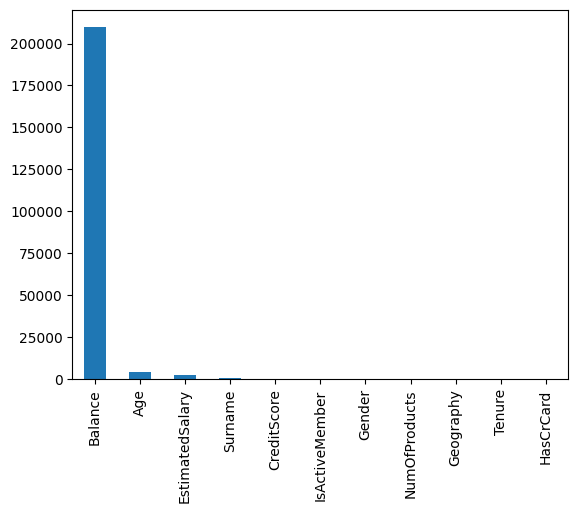

In [ ]:
chi_values=pd.Series(chi_scores[0],index=X.columns)
chi_values.sort_values(ascending=False,inplace=True)
chi_values.plot.bar()

<Axes: >

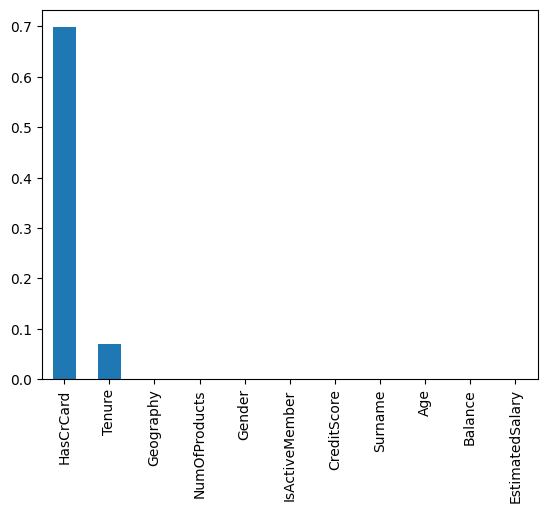

In [ ]:
p_values=pd.Series(chi_scores[1],index=X.columns)
p_values.sort_values(ascending=False,inplace=True)
p_values.plot.bar()

In [ ]:
df.describe()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1507.774200,259.584600,0.746300,0.545700,20.920600,5.012800,2036.788100,0.530200,0.70550,0.515100,4998.621200,0.203700
std,846.204311,96.496107,0.827529,0.497932,10.482065,2.892174,2125.232536,0.581654,0.45584,0.499797,2886.711202,0.402769
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,773.750000,193.000000,0.000000,0.000000,14.000000,3.000000,0.000000,0.000000,0.00000,0.000000,2498.750000,0.000000
50%,1542.000000,261.000000,0.000000,1.000000,19.000000,5.000000,1383.500000,0.000000,1.00000,1.000000,4998.500000,0.000000
75%,2238.250000,327.000000,1.000000,1.000000,26.000000,7.000000,3882.250000,1.000000,1.00000,1.000000,7498.250000,0.000000
max,2931.000000,459.000000,2.000000,1.000000,69.000000,10.000000,6381.000000,3.000000,1.00000,1.000000,9998.000000,1.000000


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [ ]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [ ]:
pca = PCA(n_components=10)
pca_X = pca.fit_transform(scaled_X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(pca_X, Y, test_size=0.2, random_state=42)


In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

<Axes: >

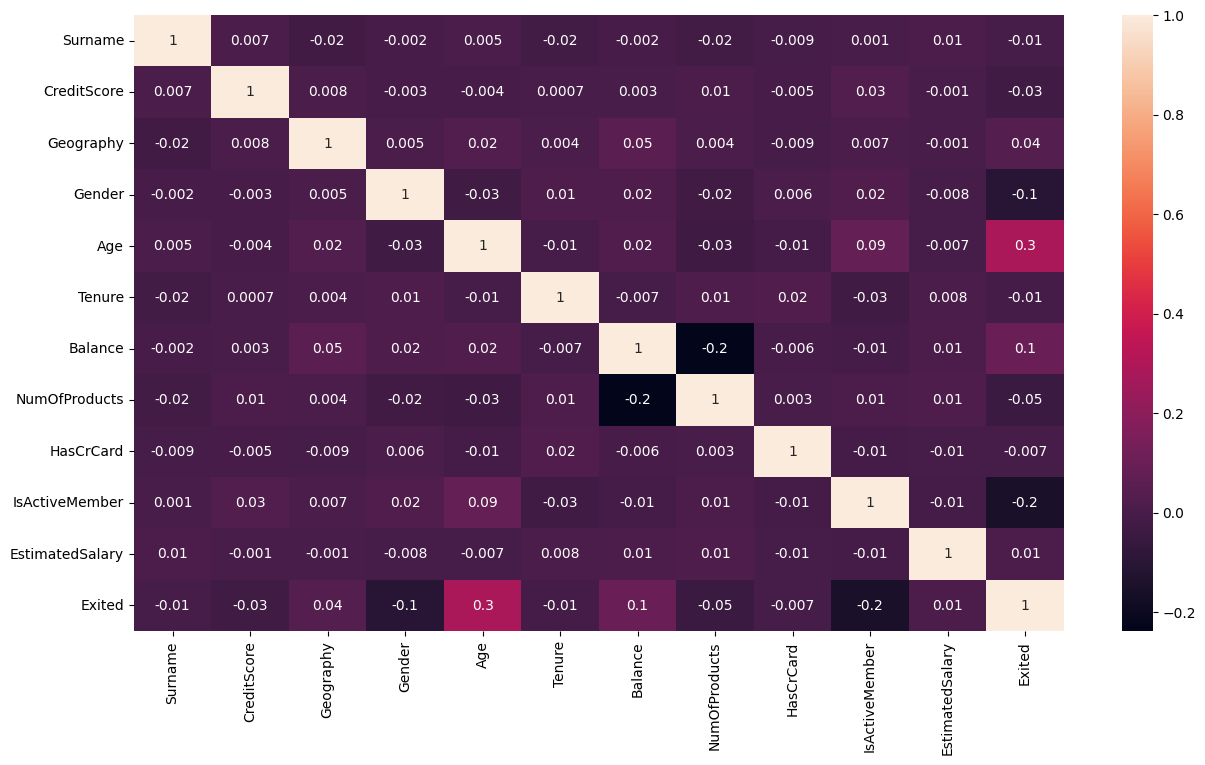

In [ ]:
plt.figure(figsize=(15, 8))
sns.heatmap(data=df.corr(), annot=True, fmt='.1g')

<ipython-input-41-9732c3d1351e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.CreditScore)


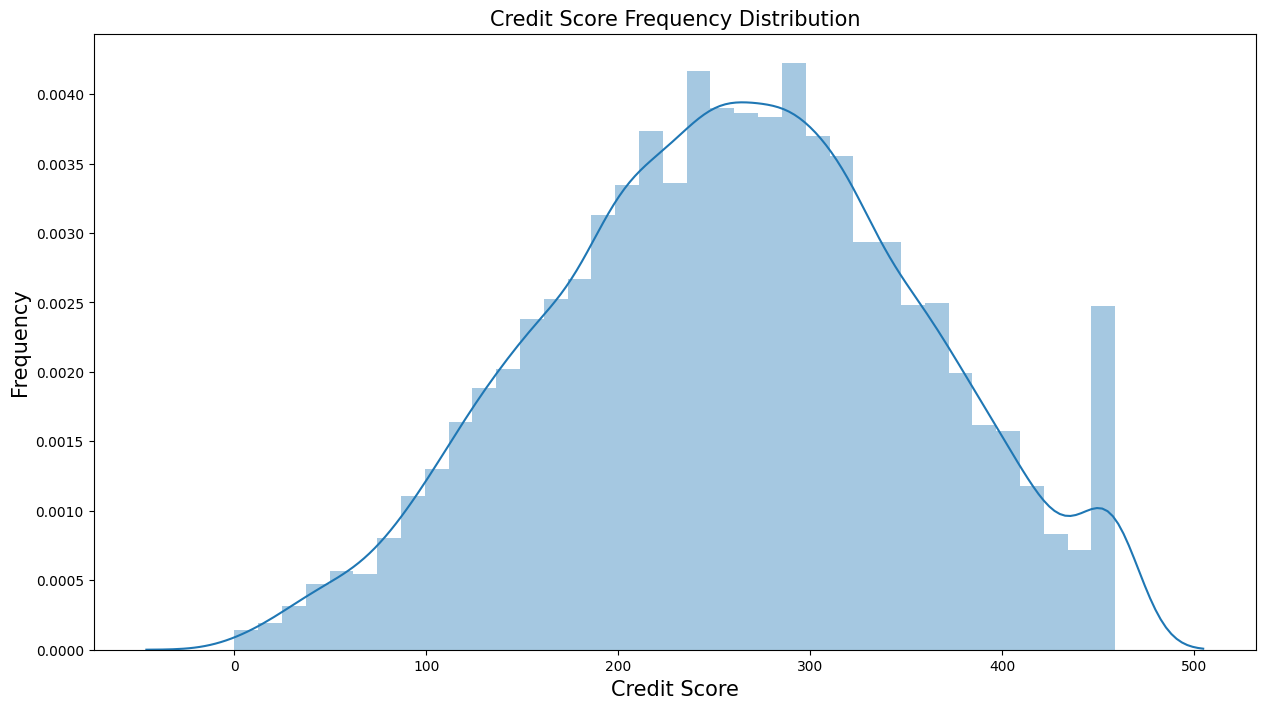

In [ ]:
plt.figure(figsize=(15, 8))
sns.distplot(df.CreditScore)
plt.ylabel('Frequency', fontsize=15)
plt.xlabel('Credit Score', fontsize=15)
plt.title('Credit Score Frequency Distribution', fontsize=15)
plt.show()

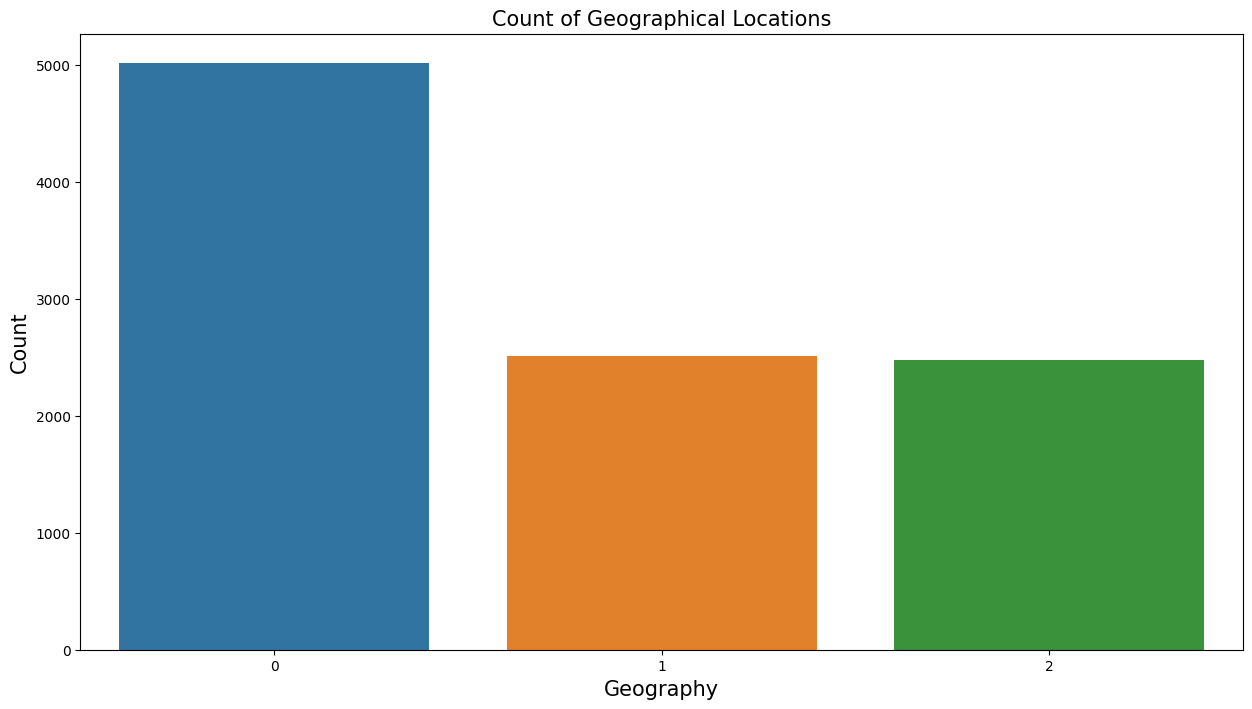

In [ ]:
plt.figure(figsize=(15, 8))
sns.countplot(x=df.Geography)
plt.xlabel('Geography', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Count of Geographical Locations', fontsize=15)
plt.show()

<Figure size 1500x800 with 0 Axes>

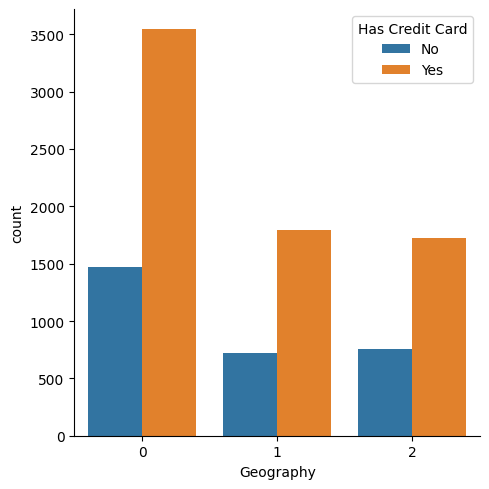

In [ ]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='HasCrCard', data=df, legend=False)
plt.legend(title='Has Credit Card', labels=['No', 'Yes'])
plt.show()

<Figure size 1500x800 with 0 Axes>

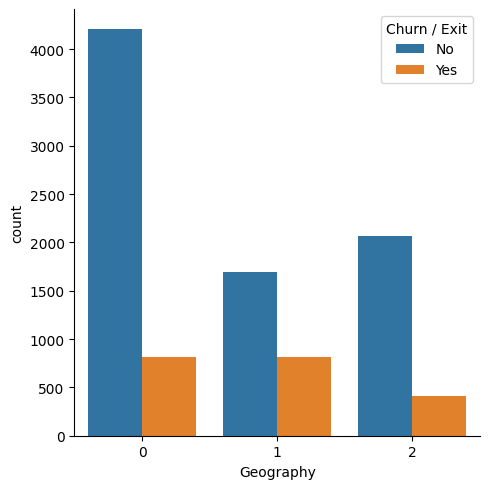

In [ ]:
plt.figure(figsize=(15, 8))
sns.catplot(kind='count', x='Geography', hue='Exited', data=df, legend=False)
plt.legend(title='Churn / Exit', labels=['No', 'Yes'])
plt.show()